INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


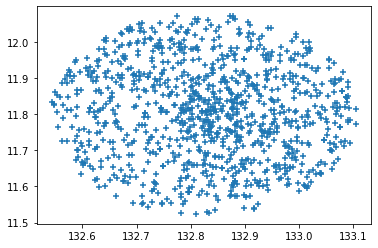

In [66]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

result_table = Simbad.query_object("Gaia DR2 4687500098271761792")
#raValue = result_table['RA']
#decValue = result_table['DEC']
raValue = [132.825]
decValue = [11.8]


coord = SkyCoord(ra=raValue, dec=decValue, unit=(u.degree, u.degree), frame='icrs')

query = """SELECT TOP 1000 * FROM gaiadr2.gaia_source 
           WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec), 
           CIRCLE('ICRS',{ra},{dec},0.2777777777777778))=1 ORDER BY random_index""".format(ra=str(coord.ra.deg[0]),dec=str(coord.dec.deg[0]))


job = Gaia.launch_job_async(query)  
r = job.get_results()

ralist = r['ra'].tolist()
declist = r['dec'].tolist()

import matplotlib.pyplot as plt
plt.scatter(ralist,declist,marker='+')
plt.show()

In [48]:
result_table['RA']

01 04 40.0128


In [53]:
result_table['DEC']

-72 19 10.819


In [56]:
coord.ra.deg[0]

1.0777813333333333

In [57]:
coord.dec.deg[0]

-72.31967194444444

In [58]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(1.07778133, -72.31967194)]>

In [59]:
coord.ra

<Longitude [1.07778133] deg>

In [60]:
coord.ra.deg

array([1.07778133])

In [61]:
coord2 = SkyCoord(ra=132.825, dec=11.8, unit=(u.degree, u.degree), frame='icrs')

In [62]:
coord2

<SkyCoord (ICRS): (ra, dec) in deg
    (132.825, 11.8)>

In [63]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(1.07778133, -72.31967194)]>

In [64]:
coord2 = SkyCoord(ra=[132.825], dec=[11.8], unit=(u.degree, u.degree), frame='icrs')

In [65]:
coord2

<SkyCoord (ICRS): (ra, dec) in deg
    [(132.825, 11.8)]>